# Synthetic Dataset Comparison: Manual, Copula, and CTGAN

This notebook compares the three synthetic datasets generated via different methods:
- Manual method (marginals + default assignment)
- Copula-based simulation
- CTGAN (neural network–based GAN)

We examine key summary statistics, default rates, value counts, and (optionally) distribution plots, following the main variables from Berg et al. (2020).


In [3]:
import pandas as pd

manual = pd.read_csv("/home/frederickerleigh/Dokumente/Fintech Seminar/NewCode/FintechSeminar-Synthetic-Dataset/fintech-credit-scoring-seminar/data/processed/synthetic_digital_footprint_with_target.csv")
copula = pd.read_csv("/home/frederickerleigh/Dokumente/Fintech Seminar/NewCode/FintechSeminar-Synthetic-Dataset/fintech-credit-scoring-seminar/data/processed/synthetic_digital_footprint_copula.csv")
ctgan = pd.read_csv("/home/frederickerleigh/Dokumente/Fintech Seminar/NewCode/FintechSeminar-Synthetic-Dataset/fintech-credit-scoring-seminar/data/processed{synthetic_digital_footprint_ctgan.csv")

datasets = {
    "Manual": manual,
    "Copula": copula,
    "CTGAN": ctgan
}

# Columns to check (adjust as needed)
main_cats = [
    "credit_score_quintile", "device_type", "os", "email_host", "channel", "checkout_time",
    "name_in_email", "number_in_email", "is_lowercase", "email_error", "gender",
    "age_quintile", "order_amount_quintile", "item_category", "month"
]
numerics = ["age", "order_amount"] if "age" in manual.columns else []


## Default Rates

We compare the mean default rate (TARGET=1) across all three synthetic datasets.


In [4]:
for name, df in datasets.items():
    default_rate = df['TARGET'].mean() if 'TARGET' in df.columns else None
    print(f"{name}: Default rate = {default_rate:.4%}")


Manual: Default rate = 0.9180%
Copula: Default rate = 0.9450%
CTGAN: Default rate = 0.8600%


## Categorical Variable Distributions

For each key variable, we compare the value counts (proportion) across the three datasets.


In [5]:
for var in main_cats:
    print(f"\n==== {var} ====")
    for name, df in datasets.items():
        if var in df.columns:
            print(f"\n{name}:")
            print(df[var].value_counts(normalize=True, dropna=False).sort_index())



==== credit_score_quintile ====

Manual:
credit_score_quintile
Q1    0.20108
Q2    0.19836
Q3    0.20074
Q4    0.20050
Q5    0.19932
Name: proportion, dtype: float64

Copula:
credit_score_quintile
Q1    0.200775
Q2    0.197875
Q3    0.198900
Q4    0.201550
Q5    0.200900
Name: proportion, dtype: float64

CTGAN:
credit_score_quintile
Q1    0.18397
Q2    0.18729
Q3    0.13084
Q4    0.20913
Q5    0.28877
Name: proportion, dtype: float64

==== device_type ====

Manual:
device_type
Desktop         0.56992
Do-not-track    0.13985
Mobile          0.11081
Tablet          0.17942
Name: proportion, dtype: float64

Copula:
device_type
Desktop         0.569325
Do-not-track    0.139675
Mobile          0.109000
Tablet          0.182000
Name: proportion, dtype: float64

CTGAN:
device_type
Desktop         0.37524
Do-not-track    0.20356
Mobile          0.17930
Tablet          0.24190
Name: proportion, dtype: float64

==== os ====

Manual:
os
Android         0.10915
Do-not-track    0.14985
Macintosh  

## Numerical Variable Summaries

We check the mean, std, min, max for age and order_amount (if available).


In [6]:
for var in numerics:
    print(f"\n==== {var} ====")
    for name, df in datasets.items():
        if var in df.columns:
            print(f"{name}: mean={df[var].mean():.2f}, std={df[var].std():.2f}, min={df[var].min():.2f}, max={df[var].max():.2f}")



==== age ====
Manual: mean=45.16, std=13.00, min=18.00, max=80.00
CTGAN: mean=44.92, std=11.40, min=13.00, max=88.00

==== order_amount ====
Manual: mean=308.98, std=282.90, min=10.00, max=1500.00
CTGAN: mean=334.80, std=208.19, min=-17.73, max=1261.14


## Optional: Plot Distributions

If you want, you can visualize categorical or numeric distributions using seaborn/matplotlib.


KeyError: 'age'

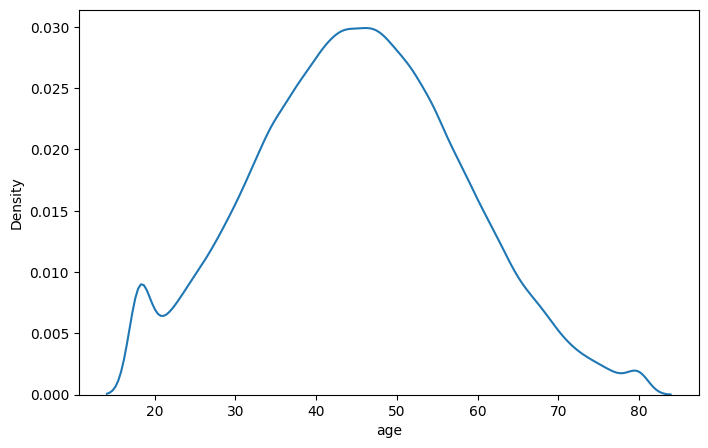

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: plot age distributions
if "age" in manual.columns:
    plt.figure(figsize=(8, 5))
    for name, df in datasets.items():
        sns.kdeplot(df['age'], label=name)
    plt.legend()
    plt.title("Age distribution by dataset")
    plt.show()

# Example: plot TARGET proportions
plt.figure(figsize=(6, 4))
for name, df in datasets.items():
    sns.barplot(x=[name], y=[df['TARGET'].mean()])
plt.ylabel('Default Rate')
plt.title('Default Rate by Dataset')
plt.show()
